# Zero/One

Run the source code:

In [77]:
%run "code\zeroone.py"

## Example 4.1

The following code demonstrates the model with the small input, created using the `text_to_tensor()` and `space_pad()` functions. The `text` string input can be modified. The output of the model is a sequence $\left\{\pmb{q}_t\right\}_{t=1}^T$ as described in chapter 4; if the sequence length is greater than 25 then the transpose is printed to keep the output to a sensible number of lines.

In [158]:
text = 'test with zero and one'

textt = text_to_tensor(space_pad(text))
M = make_rnn_model()
out = M.predict(textt, verbose=0)
if out.shape[1] <= 25:
    print(out)
else:
    print(out.reshape(out.shape[1],2).T)

[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [1. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 1.]]]


The code below shows the hidden state of the recurrent layer; best viewed for outputs from an input string of less than 25 characters.

In [160]:
M_hidden = tf.keras.Model(inputs=M.input, outputs=M.layers[1].output)
out = M_hidden.predict(textt, verbose=0)
if out.shape[1] <= 25:
    print(out)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]]


## Example 4.2

The following code demonstrates the model with the full input, created using the `text_to_onehot()` and `space_pad()` functions. The `text` string input can be modified. The output of the model should be the same as Example 4.1 if the same input `text` is used.

In [161]:
text = 'test with zero and one'

textt = text_to_onehot(space_pad(text))
Mf = make_full_rnn_model()
out = Mf.predict(textt, verbose=0)
if out.shape[1] <= 25:
    print(out)
else:
    print(out.reshape(out.shape[1],2).T)

[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [1. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 1.]]]


## Figure code

The following code produces the figures contained in this chapter.

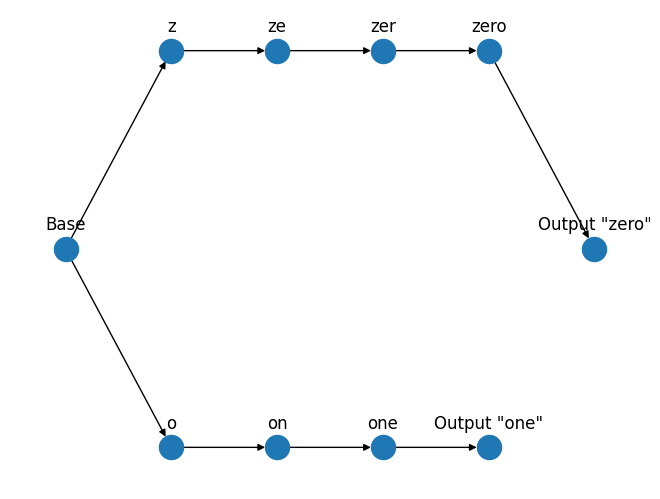

In [133]:
tf.random.set_seed(210138711)
 
nodes = {'1':'Base',
'2':'z',
'3':'ze',
'4':'zer',
'5':'zero',
'6':'Output "zero"',
'7':'o',
'8':'on',
'9':'one',
'10':'Output "one"'}

edges = [('1', '2'),
('2', '3'),
('3', '4'),
('4', '5'),
('5', '6'),
('1', '7'),
('7', '8'),
('8', '9'),
('9', '10')]

layers = {'1': 1,
'2': 2,
'3': 3,
'4': 4,
'5': 5,
'6': 6,
'7': 2,
'8': 3,
'9': 4,
'10': 5}

nx_graph = nx.DiGraph() # Made this a DiGraph (adds arrows to visual)
#plt.figure(figsize=(8,8)) # Enlarged figure

for key, value in nodes.items():
    nx_graph.add_node(key, name=value, layer=layers[key])

for edge in edges:
    nx_graph.add_edge(*edge)

def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

pos = nx.multipartite_layout(nx_graph, subset_key="layer")
pos_nodes = nudge(pos, 0, 0.025) 

nx.draw(nx_graph, pos=pos, with_labels=False)
nx.draw_networkx_labels(nx_graph, labels=nodes, pos=pos_nodes)

plt.show()